สรุปหลักการ
yf.download() บางครั้งส่งข้อมูลแบบ MultiIndex columns ซึ่งชั้นแรกเป็นประเภท (Price) ชั้นสองเป็น Ticker (AAPL)

เราต้องเลือกชั้นที่ 2 (get_level_values(1)) เพื่อเอาแค่ชื่อหุ้นมาใช้เป็นชื่อคอลัมน์

รีเซ็ต index เพื่อเอาคอลัมน์ Date ออกมาใช้งานได้ง่าย

ตั้งชื่อคอลัมน์ใหม่ให้เหมาะสมและเรียงลำดับ

แปลง Date ให้อยู่ในรูปแบบที่ใช้งานง่าย เช่น datetime หรือ string

### ดึงข้อมูล ลบคอลัมน์ เปลี่ยน Types index = Datetime

In [38]:
# ติดตั้งไลบรารีที่จำเป็น
!pip install yfinance ta mplfinance

*********************************
คำอธิบาย 
import yfinance as yf

นำเข้าไลบรารี yfinance ซึ่งใช้สำหรับดึงข้อมูลหุ้นย้อนหลังจาก Yahoo Finance

ตั้งชื่อย่อว่า yf เพื่อเรียกใช้ฟังก์ชันได้ง่ายขึ้น

import pandas as pd

นำเข้าไลบรารี pandas ซึ่งเป็นไลบรารีหลักสำหรับจัดการข้อมูลในรูปแบบตาราง (DataFrame)

ตั้งชื่อย่อว่า pd

import mplfinance as mpf

นำเข้าไลบรารี mplfinance ใช้สำหรับการสร้างกราฟราคาหุ้นแบบเทคนิคัล เช่น กราฟแท่งเทียน (candlestick chart)

symbol = 'AAPL'

กำหนดสัญลักษณ์หุ้นที่ต้องการดึงข้อมูล ในที่นี้คือ 'AAPL' (Apple Inc.)

start_date = '2023-01-01' และ end_date = '2024-06-01'

กำหนดช่วงเวลาที่ต้องการดึงข้อมูลหุ้นย้อนหลัง ตั้งแต่วันที่ 1 มกราคม 2023 ถึง 1 มิถุนายน 2024

df = yf.download(symbol, start=start_date, end=end_date)

ใช้ฟังก์ชัน download ของ yfinance เพื่อดึงข้อมูลหุ้นสัญลักษณ์ที่ระบุในช่วงเวลาที่กำหนด

ผลลัพธ์จะได้เป็น DataFrame ที่เก็บข้อมูลราคาหุ้นรายวัน เช่น ราคาปิด (Close), ราคาสูงสุด (High), ราคาต่ำสุด (Low), ราคาปิดปรับปรุง (Adj Close), และปริมาณซื้อขาย (Volume)



In [39]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

symbol = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

df = yf.download(symbol, start=start_date, end=end_date)





[*********************100%***********************]  1 of 1 completed


In [40]:
print(df)

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.470612  129.226052  122.582119  128.613985  112117500
2023-01-04  124.744125  127.014716  123.480495  125.267347   89113600
2023-01-05  123.421257  126.136090  123.164587  125.504275   80962700
2023-01-06  127.962418  128.623848  123.292909  124.398589   87754700
2023-01-09  128.485626  131.703947  128.228957  128.801541   70790800
...                ...         ...         ...         ...        ...
2023-12-22  192.192566  193.989405  191.567141  193.761066   37122800
2023-12-26  191.646545  192.480435  191.428144  192.202472   28919300
2023-12-27  191.745819  192.093281  189.700797  191.090629   48087700
2023-12-28  192.172684  193.244834  191.765661  192.728610   34049900
2023-12-29  191.130325  192.986726  190.336138  192.490361   42628800

[250 rows x 5 colum

In [41]:
df.columns = df.columns.get_level_values(1)

# ถ้า Date ยังเป็น index อยู่ อยาก reset index ให้ Date เป็นคอลัมน์
df = df.reset_index()


print(df.head())

Ticker       Date        AAPL        AAPL        AAPL        AAPL       AAPL
0      2023-01-03  123.470612  129.226052  122.582119  128.613985  112117500
1      2023-01-04  124.744125  127.014716  123.480495  125.267347   89113600
2      2023-01-05  123.421257  126.136090  123.164587  125.504275   80962700
3      2023-01-06  127.962418  128.623848  123.292909  124.398589   87754700
4      2023-01-09  128.485626  131.703947  128.228957  128.801541   70790800


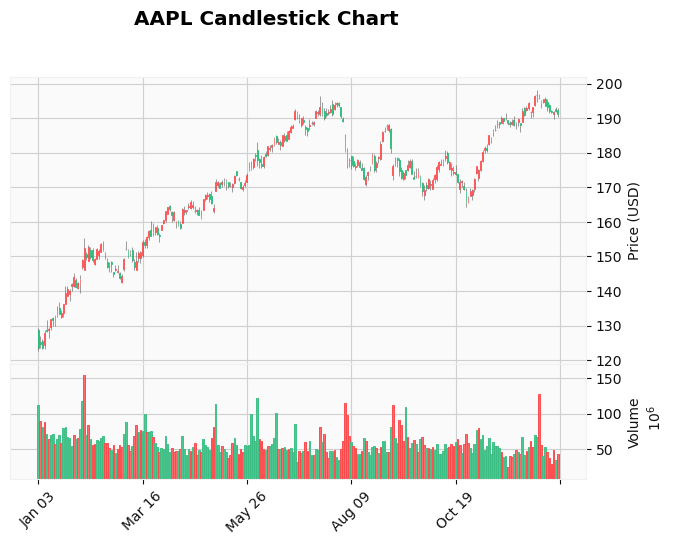

In [42]:

# 1. ตั้งชื่อคอลัมน์ให้ถูกต้อง (ตามลำดับที่ Yahoo Finance ส่งมา)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# 2. แปลงคอลัมน์ Date ให้เป็น datetime ถ้ายังไม่ใช่
df['Date'] = pd.to_datetime(df['Date'])

# 3. ตั้ง Date ให้เป็น index
df.set_index('Date', inplace=True)

# 4. จัดลำดับคอลัมน์ให้ตรงกับสิ่งที่ mplfinance ต้องการ
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 5. วาดกราฟแท่งเทียน
import mplfinance as mpf

mpf.plot(df,
         type='candle',
         volume=True,
         style='yahoo',
         title='AAPL Candlestick Chart',
         ylabel='Price (USD)',
         ylabel_lower='Volume')


In [43]:
print(df.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [44]:
print(df.head())

                  Open        High         Low       Close     Volume
Date                                                                 
2023-01-03  123.470612  129.226052  122.582119  128.613985  112117500
2023-01-04  124.744125  127.014716  123.480495  125.267347   89113600
2023-01-05  123.421257  126.136090  123.164587  125.504275   80962700
2023-01-06  127.962418  128.623848  123.292909  124.398589   87754700
2023-01-09  128.485626  131.703947  128.228957  128.801541   70790800


In [45]:
import mplfinance as mpf


In [46]:
# ถ้า Date เป็น index อยู่แล้ว ไม่ต้อง reset หรือเลือกมันอีก
if 'Date' in df.columns:
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
else:
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Date อยู่ใน index แล้ว


In [47]:
print(df.head())

                  Open        High         Low       Close     Volume
Date                                                                 
2023-01-03  123.470612  129.226052  122.582119  128.613985  112117500
2023-01-04  124.744125  127.014716  123.480495  125.267347   89113600
2023-01-05  123.421257  126.136090  123.164587  125.504275   80962700
2023-01-06  127.962418  128.623848  123.292909  124.398589   87754700
2023-01-09  128.485626  131.703947  128.228957  128.801541   70790800


### การคำนวณอินดิเคเตอร์ทางเทคนิค

In [48]:
import talib

# SMA: ค่าเฉลี่ยเคลื่อนที่แบบง่าย
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

# EMA: ค่าเฉลี่ยเคลื่อนที่แบบเอ็กซ์โพเนนเชียล
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

# RSI: ดัชนีความแข็งแกร่งเชิงสัมพันธ์
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD: Moving Average Convergence Divergence
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], 
                                                             fastperiod=12, 
                                                             slowperiod=26, 
                                                             signalperiod=9)


✅ แสดงกราฟแท่งเทียน + SMA หรือ EMA

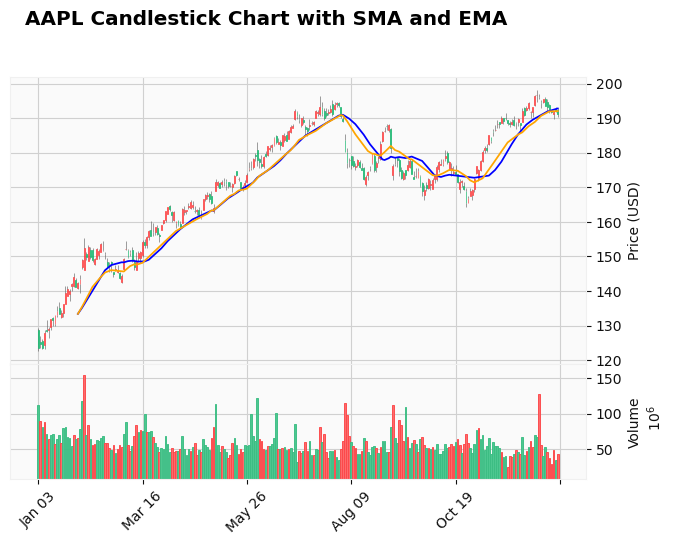

In [49]:
# กำหนดค่าเฉลี่ยที่ต้องการให้โชว์บนกราฟแท่งเทียน
apds = [mpf.make_addplot(df['SMA_20'], color='blue'),
        mpf.make_addplot(df['EMA_20'], color='orange')]

# สร้างกราฟแท่งเทียน
mpf.plot(df,
         type='candle',
         volume=True,
         style='yahoo',
         title='AAPL Candlestick Chart with SMA and EMA',
         ylabel='Price (USD)',
         ylabel_lower='Volume',
         addplot=apds)


In [50]:
print(df[['Close', 'SMA_20', 'EMA_20', 'RSI_14', 'MACD']].tail(10))


                 Close      SMA_20      EMA_20     RSI_14      MACD
Date                                                               
2023-12-15  196.093980  190.801732  190.235403  73.229521  3.637273
2023-12-18  194.664455  191.091611  190.657217  67.323090  3.549321
2023-12-19  194.733927  191.402831  191.045475  67.460448  3.445506
2023-12-20  195.468564  191.675335  191.466722  68.946945  3.383509
2023-12-21  194.674369  191.904159  191.772212  65.465162  3.233022
2023-12-22  193.761066  192.118093  191.961627  61.611939  3.005419
2023-12-26  192.202472  192.301251  191.984564  55.597787  2.668516
2023-12-27  191.090629  192.435767  191.899428  51.719342  2.285456
2023-12-28  192.728610  192.596589  191.978397  56.530353  2.089958
2023-12-29  192.490361  192.798113  192.027156  55.661541  1.893968


✅ แนวโน้มราคา (Trend)
ดูจากค่าเฉลี่ยเคลื่อนที่ เช่น:

In [51]:
if df['EMA_20'].iloc[-1] > df['EMA_20'].iloc[-5]:
    print("EMA 20 มีแนวโน้มขึ้น")
else:
    print("EMA 20 มีแนวโน้มลง")



EMA 20 มีแนวโน้มขึ้น


✅ แนวรับ-แนวต้าน (Support/Resistance) แบบพื้นฐาน
ใช้ rolling window เพื่อหาจุดต่ำสุด (Support) และสูงสุด (Resistance) ย้อนหลัง 20 วัน:

In [52]:
df['Support_20'] = df['Low'].rolling(window=20).min()
df['Resistance_20'] = df['High'].rolling(window=20).max()


In [53]:
print(f"แนวรับล่าสุด (20 วัน): {df['Support_20'].iloc[-1]:.2f}")
print(f"แนวต้านล่าสุด (20 วัน): {df['Resistance_20'].iloc[-1]:.2f}")


แนวรับล่าสุด (20 วัน): 186.09
แนวต้านล่าสุด (20 วัน): 198.17


✅ แสดงกราฟแท่งเทียนพร้อมแนวรับ-แนวต้าน

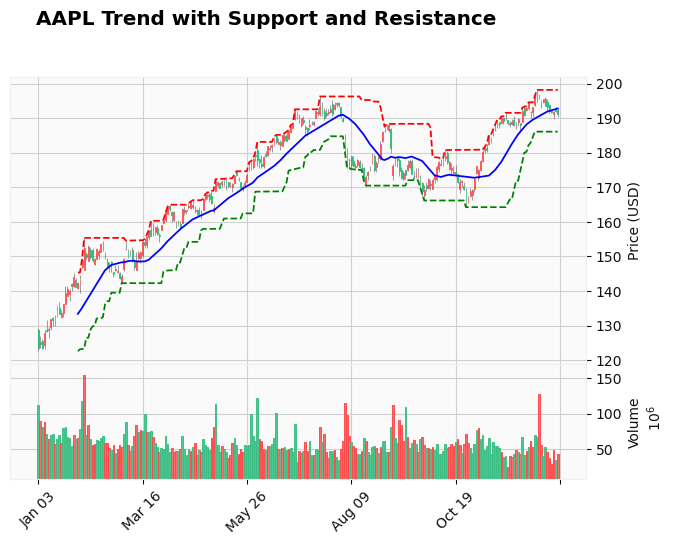

In [54]:
apds = [
    mpf.make_addplot(df['SMA_20'], color='blue'),
    mpf.make_addplot(df['Support_20'], color='green', linestyle='dashed'),
    mpf.make_addplot(df['Resistance_20'], color='red', linestyle='dashed'),
]

mpf.plot(df,
         type='candle',
         volume=True,
         style='yahoo',
         title='AAPL Trend with Support and Resistance',
         ylabel='Price (USD)',
         ylabel_lower='Volume',
         addplot=apds)


Fibonacci retracement levels:
  Level 0.0% : 198.17
  Level 23.6% : 180.33
  Level 38.2% : 169.29
  Level 50.0% : 160.38
  Level 61.8% : 151.46
  Level 100.0% : 122.58


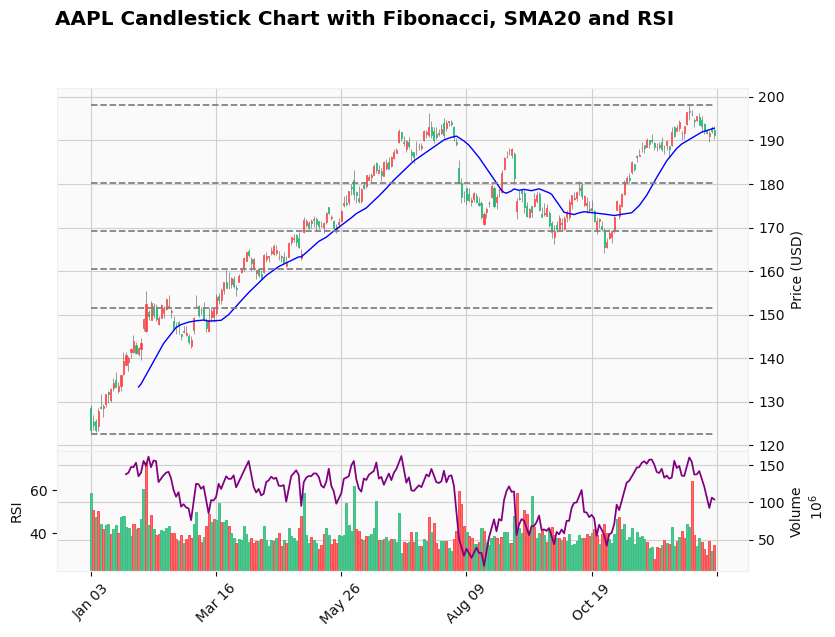

In [55]:
# 3. คำนวณ Fibonacci retracement
low = df['Low'].min()
high = df['High'].max()
diff = high - low
fib_levels = [0, 0.236, 0.382, 0.5, 0.618, 1]
fib_prices = [high - diff * level for level in fib_levels]

print("Fibonacci retracement levels:")
for level, price in zip(fib_levels, fib_prices):
    print(f"  Level {level*100:.1f}% : {price:.2f}")

# 4. คำนวณ SMA20 และ RSI14
df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['RSI14'] = talib.RSI(df['Close'], timeperiod=14)

# 5. เตรียม addplot สำหรับเส้น SMA20 และเส้น Fibonacci
apds = [
    mpf.make_addplot(df['SMA20'], color='blue', width=1.0),
]

for price in fib_prices:
    apds.append(mpf.make_addplot([price]*len(df), type='line', linestyle='dashed', color='gray'))

# 6. เตรียมแผนภูมิ RSI แยกด้านล่าง
rsi_plot = mpf.make_addplot(df['RSI14'], panel=1, color='purple', ylabel='RSI')

apds.append(rsi_plot)

# 7. วาดกราฟ
mpf.plot(df,
         type='candle',
         volume=True,
         style='yahoo',
         title=f'{symbol} Candlestick Chart with Fibonacci, SMA20 and RSI',
         ylabel='Price (USD)',
         ylabel_lower='Volume',
         addplot=apds,
         panel_ratios=(6,2),  # เพิ่มความสูงให้ RSI panel เล็กกว่า main panel
         figscale=1.2)

In [56]:
# 3. สร้างเป้าหมาย (target) สำหรับ Machine Learning เช่น "ราคาปิดวันถัดไป"
df['Close_next'] = df['Close'].shift(-1)

# 4. ลบแถวที่มีค่า missing (NaN) เพราะ indicator และ target อาจจะขาดข้อมูลบางแถว
df = df.dropna()

# 5. เซฟ DataFrame ลง Excel
output_filename = 'stock_features.xlsx'
df.to_excel(output_filename)

print(f"Exported data with features to {output_filename}")

Exported data with features to stock_features.xlsx
